# E-commerce - App vs Website

This company sells clothing online but they also have in-store style and clothing advice sessions. Customers can have meetings with a personal stylist and then can go home and order either on the mobile app or the website.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

### Imports
matplotlib & seaborn for data visualisation

pandas & numpy for data anlysis/manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Retrieve the data

The company provides a csv file.

 

Use pandas read_csv() function to read the data into a pandas DataFrame.

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


The data has the fields:

* Email: User email address
* Address: User street address
* Avatar: Colour of their profile avatar
* Avg. Session Length: Average session of in-store sessions for each user
* Time on App: Average time spent on App (in minutes)
* Time on Website: Average time spent on Website (in minutes)
* Length of Membership: How many years the customer has been a member
* Yearly amount spent: The amount of money spent on the App and Website

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Analysis

In [6]:
sns.set_palette("OrRd_d")
sns.set_style('whitegrid')

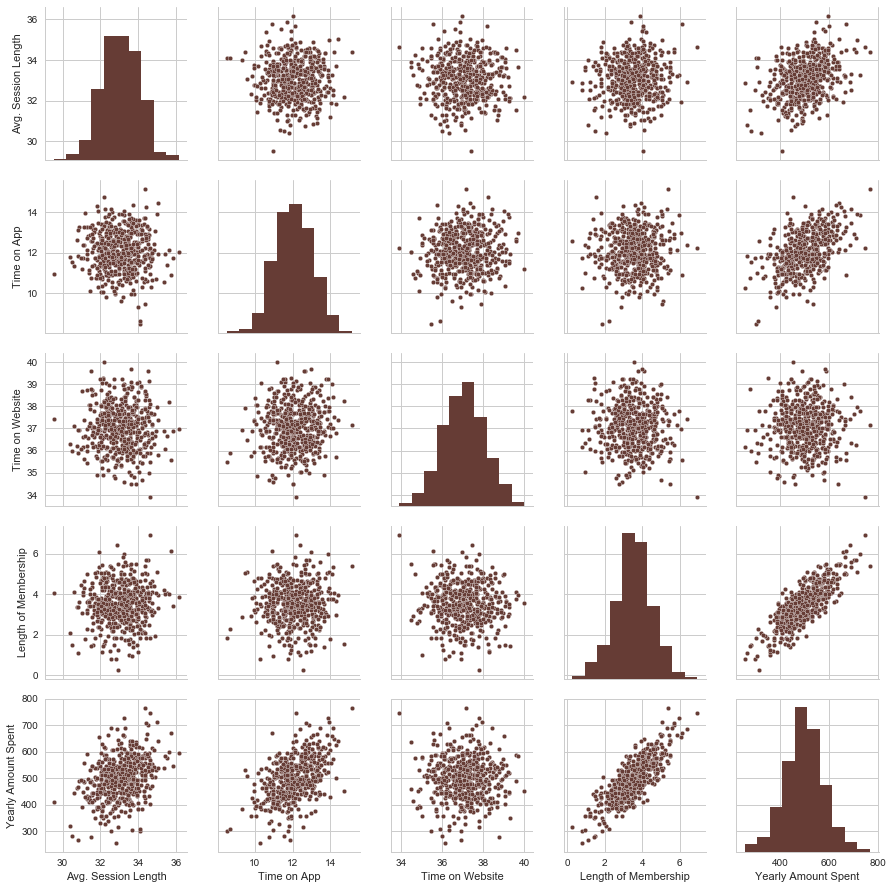

In [7]:
sns.pairplot(customers, plot_kws={"s": 20})

**Based off this plot, Yearly Amount Spent and Length of Membership appear to have the strongest correlation**

Linear model plot of  Yearly Amount Spent against Length of Membership.

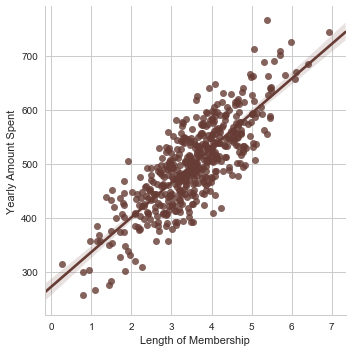

In [8]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent', data=customers)

## Training and testing a linear model

In [9]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [10]:
y = customers['Yearly Amount Spent']

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()

** Train lm on the training data.**

In [13]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the model by predicting test data

In [14]:
predictions = lm.predict(X_test)

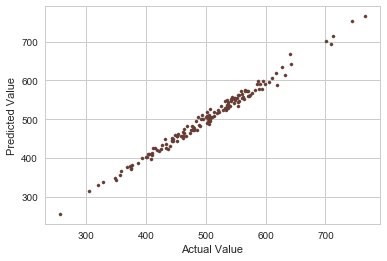

In [15]:
plt.scatter(y_test, predictions, s=10)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

## Evaluate the Model

With sklearn.metrics, errors can be easily calculated

* MAE  - Mean Absolute Error
* MSE  - Mean Squared Error
* RMSE - Root Mean Squared Error. 

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


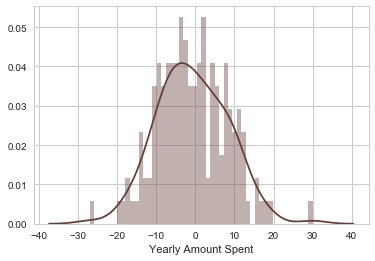

In [17]:
sns.distplot(y_test-predictions, bins=50)

## So: App or Website?

Should the company focus their efforts on the mobile app or on website development?
Or maybe that doesn't even really matter, and Membership Time is what is really important.

In [18]:
coefficients = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


This means that, with everything else fixed:

* An increase of 1 in Avg. Session length increases the Yearly Amount Spend by 26

* An increase of 1 in Time on App increases the Yearly Amount Spend by 39

* An increase of 1 in Time on Website increases the Yearly Amount Spend by 0.2

* An increase of 1 in Length of Membership increases the Yearly Amount Spend by 61

**Do you think the company should focus more on their mobile app or on their website?**

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. 

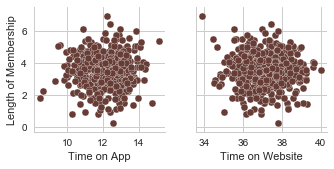

In [19]:
sns.pairplot(data=customers, x_vars=["Time on App", "Time on Website"], y_vars="Length of Membership")

There appears to be no correlation between Length of Membership and time spent on platform.



In [20]:
new_customers = customers[customers["Length of Membership"] < 1]

In [21]:
new_customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,33.088377,11.589118,36.450922,0.753211,306.319628
std,0.478488,0.969100,1.030305,0.281619,36.130425
min,32.529769,10.256549,35.012806,0.269901,256.670582
25%,32.836941,10.985764,36.143908,0.789520,298.762008
50%,32.904854,11.747732,36.352503,0.801516,304.135592
75%,33.503705,12.399436,36.939882,0.936498,314.438518
max,33.666616,12.556108,37.805509,0.968622,357.591439


With only 5 new members (less than year membership), it's hard to determine a correlation, however from these 5 it can be seen that most of their time is spent on the website. It could be possible that the website is not 'friendly' for newer customers, who then don't decide to use app. The mean Yearly Amount Spent is also less than the mean of all customers - but again this could be due to newer customers not being as confident/comfortable with the service as compared to long term members. The model does agree with this, with "Length of Membership" coefficient contrbuting nearly as much as all other factors combined.

In [22]:
web_customers = customers[customers["Time on Website"] > customers["Time on App"]]
web_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


All 500 customers had longer session lengths on the website than on the app, but the linear model coefficients show that more time on the app has a better impact on sales.

This could be because the website is less easy to navigate making it harder to find the desired item, or maybe it's easier to browse and spend more time looking through more items.

More research would have to be done into the website and app themselves to determine this

In [23]:
customers['ratio'] = customers['Time on Website'] / customers["Time on App"]
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,ratio
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,3.127272
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,3.354705
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,3.275347
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,2.676963
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,2.933654


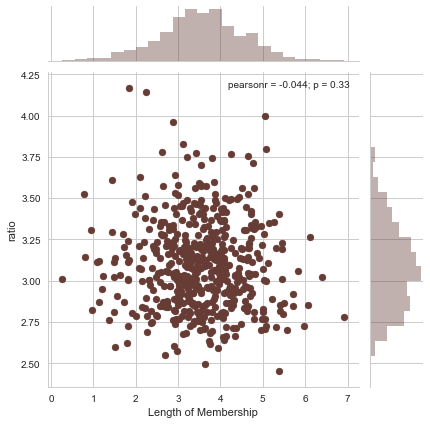

In [24]:
sns.jointplot(customers["Length of Membership"], customers["ratio"])

Again, no correlation between length of membership and a change in the Website use to App use ratio